<a href="https://colab.research.google.com/github/MontMendez/EstadisticaVerano/blob/main/practicaa02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



2 Realice un diagrama de dispersión para estos datos.




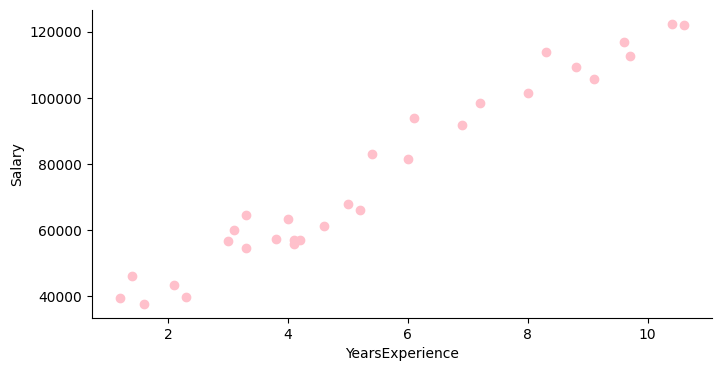

3 ¿Los datos soportan la suposición de linealidad?
Soporta la suposición de linealidad


4 Calcule el coeficiente de correlación e interprete el resultado.
Coeficiente de correlación:  0.9782



6 Obtenga la recta de regresión ajustada


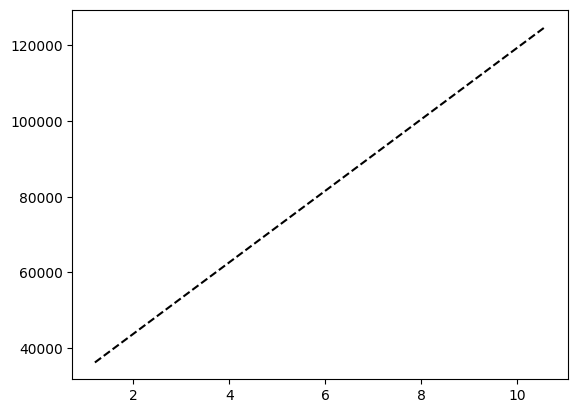

y grafíquelo sobre el gráfico de dispersión.




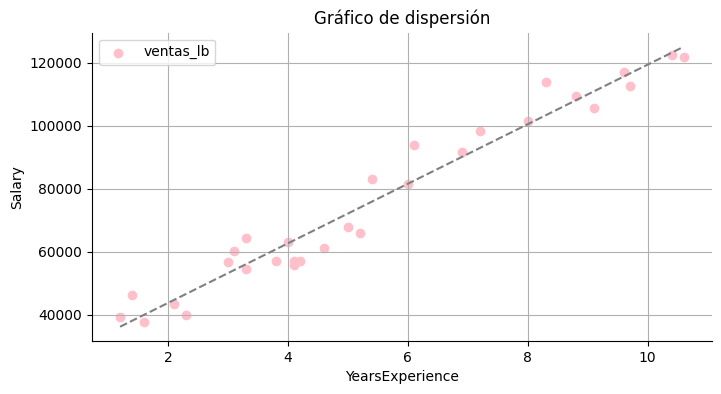

5 Calcule el coeficiente de determinación e interprete el resultado.
Coeficiente de determinación:  0.9570



7 Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ( b1 )
Intervalo de confianza para b1 de  95%
 8674.1187 < b1 <  10225.8059



8 Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?




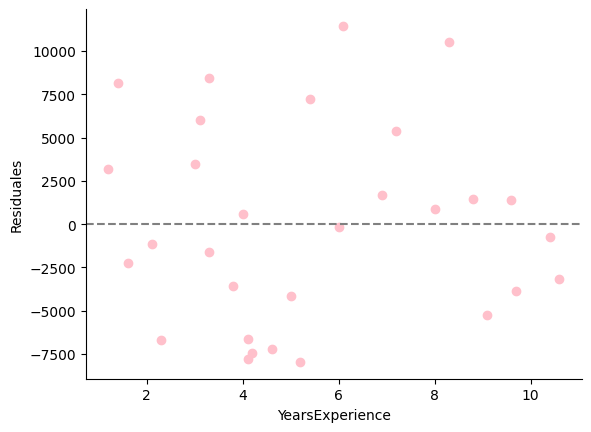

9 Realice la prueba de Shapiro para los residuales y comente el resultado.
valor-p de Shapiro:  0.1952

no se rechaza ho, por lo tanto los datos siguen una distribucción normal


10 Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.
valor_p de Breusch-Pagan:  0.5276

no se rechaza ho, hay homoscedasticidad


11 Utiliza la recta de regresión para interpolar dos valores y extrapolar uno. Comenta estos resultados
interpolar:
para x = 5, y = [72098.0155738]
para x = 8, y = [100447.90253816]
extrapolar:
para x = 21, y = [223297.41271708]


12 Realice una tabla ANOVA e interprete el resultado.
                   df        sum_sq       mean_sq           F        PR(>F)
YearsExperience   1.0  2.085685e+10  2.085685e+10  622.507203  1.143068e-20
Residual         28.0  9.381286e+08  3.350459e+07         NaN           NaN
se rechaza ho, por lo tanto b1 es diferente a 0


EN RESUMEN:
1. Soporta la suposicion de linealidad 2. Hay homoscedasticidad 3. Hay normalidad 4. Re

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/MontMendez/EstadisticaVerano/refs/heads/main/Salary_dataset.csv")
df
x = df["YearsExperience"]
y = df["Salary"]
print("\n")
print("2 Realice un diagrama de dispersión para estos datos.")
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 4), dpi = 100)
plt.scatter(x, y, label = "Salary", color = 'pink')
plt.xlabel('YearsExperience') # nombrar eje x
plt.ylabel('Salary') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)
print("\n")
plt.show()
print("3 ¿Los datos soportan la suposición de linealidad?")
print("Soporta la suposición de linealidad")
print("\n")
plt.show()
print("4 Calcule el coeficiente de correlación e interprete el resultado.")
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')
print("\n")
plt.show()
print("6 Obtenga la recta de regresión ajustada")
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
yc = modelo.predict(x_constante)
plt.plot(x, yc, color = 'black', linestyle = '--')
plt.show()
print("y grafíquelo sobre el gráfico de dispersión.")
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(x,y,
            label="ventas_lb",
            color="pink")
plt.title("Gráfico de dispersión")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.gca().spines[["top","right"]].set_visible(False)
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
yc = modelo.predict(x_constante)
plt.plot(x, yc, color = 'grey', linestyle = '--')
print("\n")
plt.show()
print("5 Calcule el coeficiente de determinación e interprete el resultado.")
from sklearn.metrics import r2_score
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')
print("\n")
plt.show()
print("7 Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ( b1 )")
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')
print("\n")
plt.show()
print("8 Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?")
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'pink')
plt.xlabel('YearsExperience')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
print("\n")
plt.show()
print("9 Realice la prueba de Shapiro para los residuales y comente el resultado.")
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')
print("no se rechaza ho, por lo tanto los datos siguen una distribucción normal")
print("\n")
plt.show()
print("10 Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.")
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
print("no se rechaza ho, hay homoscedasticidad")
print("\n")
plt.show()
print("11 Utiliza la recta de regresión para interpolar dos valores y extrapolar uno. Comenta estos resultados")
print("interpolar:")
print(f'para x = 5, y = {modelo.predict([1, 5])}')
print(f'para x = 8, y = {modelo.predict([1, 8])}')
print("extrapolar:")
print(f'para x = 21, y = {modelo.predict([1, 21])}')
print("\n")
plt.show()
print("12 Realice una tabla ANOVA e interprete el resultado.")
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('Salary ~ YearsExperience', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
print(tabla_anova)
print("se rechaza ho, por lo tanto b1 es diferente a 0")
print("\n")
plt.show()
print("EN RESUMEN:")
print(("1. Soporta la suposicion de linealidad"),
      ("2. Hay homoscedasticidad"),
      ("3. Hay normalidad"),
      ("4. Relacion fuerte entre x y y r=0.97"))
print("\n")
print("EL MODELO ES CONFIABLE PARA INTERPOLAR Y SE PUEDE EXTRAPOLAR PERO CON PRECAUCION")
print("\n")
print(modelo.get_prediction([1,4]).summary_frame(alpha=0.05))